In [1]:
import pandas as pd  # для обработки и анализа данных
import numpy as np  # библиотека для работы с массивами данных
import matplotlib.pyplot as plt  # модуль для построения графиков
import seaborn as sns  # библиотека для визуализации данных, основанная на matplotlib
from sklearn.preprocessing import \
    LabelEncoder  # инструмент для кодирования категориальных переменных (уходим от символов к числам)
from scipy import stats  # библиотека для научных и математических вычисление

In [33]:
sns.set(style='whitegrid')

In [34]:
file_path = 'train.csv'
df = pd.read_csv(file_path)

Получаем общую информацию о содержании датасета: количество столбцов, их наименование, тип данных, количество заполненных данных

In [35]:
# Общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
# Проверка того, в каких столбцах отсутствуют значения
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Изучаем столбцы где есть отсутствующие значения для понимания того, как можно их заполнить

Проверяем наличие выбросов с помощью графика 'ящик с усами'

<Axes: >

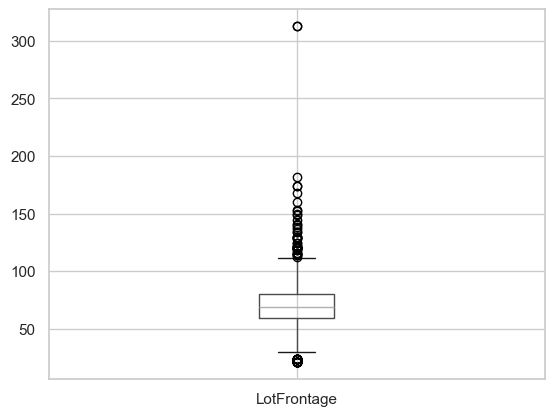

In [7]:
df.boxplot(column='LotFrontage')

Видим что выбросов много, можно также проверить с помощью описательной статистики

In [38]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Явно максимальное значение является выбросом, таким образом среднее значение брать некорректно, берем медиану и заполняем отсутствующие значения ею

In [39]:
# Всем пропущенным цифровым данным присвоены значения
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())  # замена пропущенных значений на медиану

In [40]:
df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Проверяем что теперь в данном столбце нет пустых значений

In [41]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Изучаем следующий столбец с отсутствующими данными. Так как из 1460 значений всего 91 есть, остальные пустые, можно удалить этот столбец из датасета. Его данные по наличию аллеи в доме можно признать незначительными

In [42]:
df.drop('Alley', axis=1, inplace=True)

Анализируем следующий столбец. Понимаем, что вместо отсутвющих значений должны быть значения: Нет (No)

In [43]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [44]:
df['MasVnrType'] = df['MasVnrType'].fillna('No')  # замена пропущенных значений на 'No'

In [45]:
df['MasVnrType'].value_counts() # проверяем что замена прошла

MasVnrType
No         872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [46]:
df['Fireplaces'].value_counts() # понимаем, что количество отсутствующих значений в столбце FireplaceQu совпадет с количеством каминов 0. Поэтому можно заменить также на No

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [47]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')  # замена пропущенных значений на 'No'

In [48]:
df['FireplaceQu'].value_counts()

FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [49]:
# Проверка того, в каких столбцах отсутствуют значения
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [50]:
df['PoolArea'].value_counts()  # понимаем, что количество отсутствующих значений в столбце PoolQC совпадет с количеством бассейнов 0. Поэтому можно заменить также на No

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [51]:
df['PoolQC'] = df['PoolQC'].fillna('No')

In [52]:
df['PoolQC'].value_counts()

PoolQC
No    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64

В колонках MiscFeature и Fence поставим в пустые значения тоже No

In [53]:
df['MiscFeature'] = df['MiscFeature'].fillna('No')

In [54]:
df['Fence'] = df['Fence'].fillna('No')

Проверяем итоговые данные по таблице и пустые значения

In [55]:
df.info() # на одну строку стало меньше, так как удалили один столбец

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [56]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [57]:
df = df.drop_duplicates()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Удалили дубликаты, но как видно, их не было, так как количество строк не поменялось

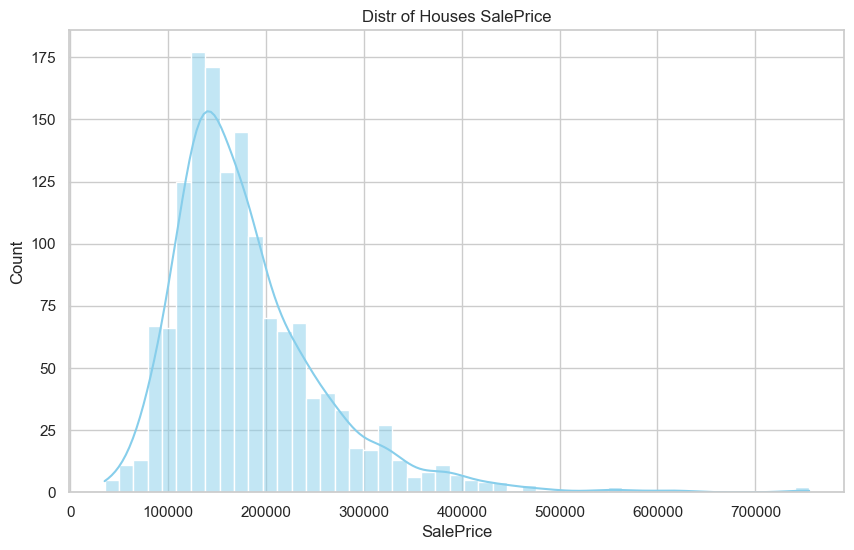

In [29]:
# гистограмма распределения цены SalePrice
plt.figure(figsize=(10, 6))  # размер поля графика
sns.histplot(df['SalePrice'], kde=True, color='skyblue')  # построение гистограммы и кривой плотности распределения
plt.title('Distr of Houses SalePrice')
plt.show()  # отображение графика

In [59]:
label_encoder = LabelEncoder()
df['BldgType_Encoded'] = label_encoder.fit_transform(df['BldgType'])  # преобразование категорийной переменной BldgType: Тип жилья в числовую

In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BldgType_Encoded
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,No,No,No,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,No,No,No,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,No,No,No,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,No,No,No,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,No,No,No,0,12,2008,WD,Normal,250000,0


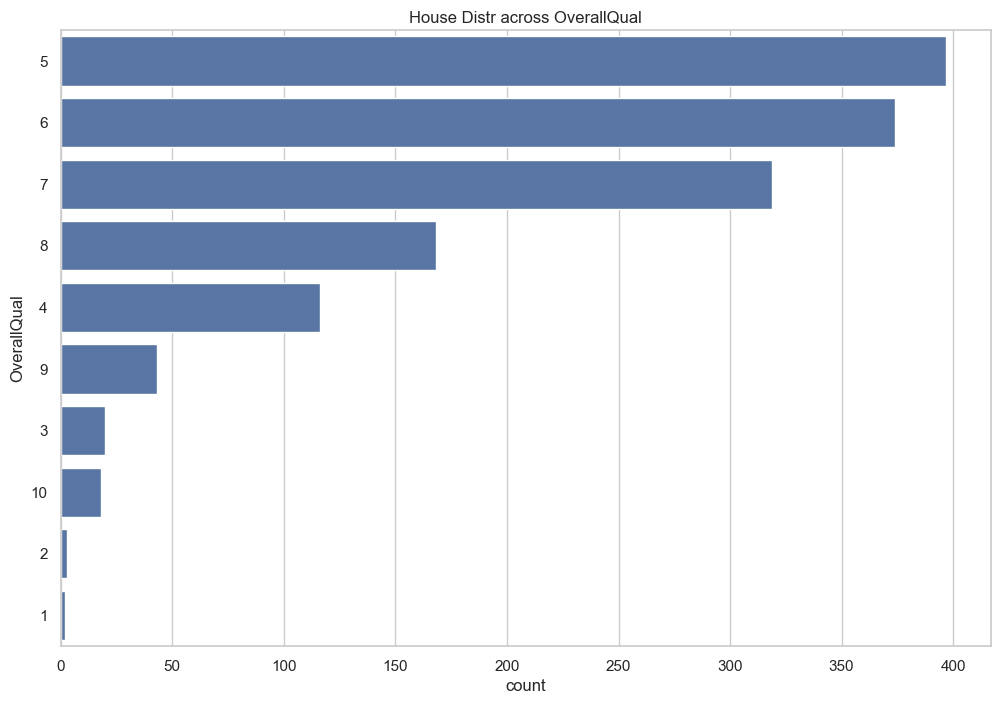

In [64]:
# распределение домов по OverallQual: Оценивает общие материалы и отделку дома
plt.figure(figsize=(12, 8))  # размер поля графика
sns.countplot(y='OverallQual', data=df, order=df['OverallQual'].value_counts().index)
plt.title('House Distr across OverallQual')
plt.show()  # отображение графика

Как видим наиболее количество домов со средний оценкой качества

Далее сохраняем очищенную таблицу

In [65]:
df.to_csv('hw_8.csv', index=False)